### Fraud Detection Exploratory Data Analysis


#### Contents

- Understanding the Problem Statement  
- Data Collection  
- Data Checks to perform  
- Exploratory data analysis  
- Data Pre-Processing


#### 1.) Problem Statement


The objective is to identify fraudulent activities in loan applications and transactions by analyzing different factors such as loan type,monthly income,employment status,etc.


#### 2.) Data Collection


Dataset Source For Loan Application - https://www.kaggle.com/datasets/prajwaldongre/loan-application-and-transaction-fraud-detection/data

The data consitss of 21 columns  and  50000 rows

Dataset Source For Transaction - https://www.kaggle.com/datasets/prajwaldongre/loan-application-and-transaction-fraud-detection/dataselect=transactions.csv

The data consists of 16 columns and 50000 rows

#### 2.1 Import Data and Required Packages
#####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()


In [71]:
df1 = pd.read_csv(r'C:\Users\Zuhayr Adams\Projects\Fraud Detection\notebook\data\loan_applications.csv')
df2 = pd.read_csv(r'C:\Users\Zuhayr Adams\Projects\Fraud Detection\notebook\data\transactions.csv')


In [72]:
df1.head()

,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


In [73]:
df2.head()

,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [74]:
df1.shape

(50000, 21)

In [75]:
df2.shape

(50000, 16)

#### 2.2) Dataset Information

##### Loan Application Dataset

- **Application_ID**: Unique identifier for each loan application.
- **Customer_ID**: Unique identifier for the customer applying for the loan.
- **Application_Date**: Date when the loan application was submitted.
- **Loan_Type**: Type of loan being applied for (e.g., Home Loan, Personal Loan, Car Loan, etc.).
- **Loan_Amount_Requested**: The amount of loan requested by the applicant (in USD).
- **Loan_Tenure_Months**: Tenure of the loan in months.
- **Interest_Rate_Offered**: Interest rate offered to the applicant (as a percentage).
- **Purpose_Of_Loan**: Purpose for which the loan is being applied (e.g., Education, Business, Medical, etc.).
- **Employment_Status**: Employment status of the applicant (e.g., Employed, Self-Employed, Unemployed, etc.).
- **Monthly_Income**: Monthly income of the applicant (in USD).
- **Existing_EMIs_Monthly**: Monthly EMIs the applicant is already paying for other loans (in USD).
- **Debt_To_Income_Ratio**: Ratio of the applicant’s debt obligations to their monthly income (as a percentage).
- **Property_Ownership_Status**: Ownership status of the property (e.g., Owned, Rented, Mortgaged, etc.).
- **Residential_Address**: Residential address of the applicant.
- **Applicant_Age**: Age of the applicant (in years).
- **Gender**: Gender of the applicant (Male/Female).
- **Number_Of_Dependents**: Number of dependents the applicant has.
- **Loan_Status**: Status of the loan application (Approved/Rejected/Pending).
- **Fraud_Flag**: Whether the application has been flagged for fraud (Yes/No).
- **Fraud_Type**: If flagged as fraud, the type of fraud detected (e.g., Identity Theft, Income Fabrication, Fake Documents, etc.).


##### Transaction Dataset

- **Transaction_ID**: Unique identifier for each transaction.
- **Customer_ID**: Unique identifier for the customer making the transaction.
- **Transaction_Date**: Date and time when the transaction occurred.
- **Transaction_Type**: Type of transaction (Credit, Debit, Refund, etc.).
- **Transaction_Amount**: Amount of money involved in the transaction (in USD).
- **Merchant_Category**: Category of the merchant (Retail, Grocery, Electronics, etc.).
- **Merchant_Name**: Name of the merchant where the transaction took place.
- **Transaction_Location**: Location where the transaction occurred (city or address).
- **Account_Balance_After_Transaction**: Customer's account balance immediately after the transaction (in USD).
- **Is_International_Transaction**: Whether the transaction was international (Yes/No).
- **Device_Used**: Device used to complete the transaction (Mobile, Desktop, POS Terminal, etc.).
- **IP_Address**: IP address of the device used during the transaction.
- **Transaction_Status**: Status of the transaction (Successful, Failed, Pending, etc.).
- **Transaction_Source_Destination**: Source or destination of the funds (e.g., account, card, or wallet involved).
- **Transaction_Notes**: Additional notes or details provided about the transaction.
- **Fraud_Flag**: Whether the transaction has been flagged for fraud (Yes/No).


#### 3.) Data Checks to perform
- Check Missing values  
- Check Duplicates  
- Check data type  
- Check the number of unique values of each column  
- Check statistics of data set  
- Check various categories present in the different categorical column

##### 3.1.) Check Missing Values


In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     50000 non-null  object 
 1   customer_id                        50000 non-null  object 
 2   transaction_date                   50000 non-null  object 
 3   transaction_type                   50000 non-null  object 
 4   transaction_amount                 50000 non-null  float64
 5   merchant_category                  50000 non-null  object 
 6   merchant_name                      50000 non-null  object 
 7   transaction_location               50000 non-null  object 
 8   account_balance_after_transaction  50000 non-null  float64
 9   is_international_transaction       50000 non-null  int64  
 10  device_used                        50000 non-null  object 
 11  ip_address                         50000 non-null  obj

In [78]:
df1.isna().sum()

application_id                   0
customer_id                      0
application_date                 0
loan_type                        0
loan_amount_requested            0
loan_tenure_months               0
interest_rate_offered            0
purpose_of_loan                  0
employment_status                0
monthly_income                   0
cibil_score                      0
existing_emis_monthly            0
debt_to_income_ratio             0
property_ownership_status        0
residential_address              0
applicant_age                    0
gender                           0
number_of_dependents             0
loan_status                      0
fraud_flag                       0
fraud_type                   48974
dtype: int64

In [79]:
df2.isna().sum()

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
transaction_amount                   0
merchant_category                    0
merchant_name                        0
transaction_location                 0
account_balance_after_transaction    0
is_international_transaction         0
device_used                          0
ip_address                           0
transaction_status                   0
transaction_source_destination       0
transaction_notes                    0
fraud_flag                           0
dtype: int64

In [80]:
df1['fraud_type'].fillna('Not Fraudulent')


0        Not Fraudulent
1        Not Fraudulent
2        Not Fraudulent
3        Not Fraudulent
4        Not Fraudulent
              ...      
49995    Not Fraudulent
49996    Not Fraudulent
49997    Not Fraudulent
49998    Not Fraudulent
49999    Not Fraudulent
Name: fraud_type, Length: 50000, dtype: object

In [81]:
df1['fraud_type'].value_counts()

fraud_type
Synthetic Identity          276
Income Misrepresentation    270
Loan Stacking               242
Transaction Laundering      238
Name: count, dtype: int64

##### 3.2.) Check Duplicates

In [82]:
df1.duplicated().sum()

np.int64(0)

In [83]:
df2.duplicated().sum()

np.int64(0)

No Duplicaties in Both Datasets

##### 3.3.) Check Data Types

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     50000 non-null  object 
 1   customer_id                        50000 non-null  object 
 2   transaction_date                   50000 non-null  object 
 3   transaction_type                   50000 non-null  object 
 4   transaction_amount                 50000 non-null  float64
 5   merchant_category                  50000 non-null  object 
 6   merchant_name                      50000 non-null  object 
 7   transaction_location               50000 non-null  object 
 8   account_balance_after_transaction  50000 non-null  float64
 9   is_international_transaction       50000 non-null  int64  
 10  device_used                        50000 non-null  object 
 11  ip_address                         50000 non-null  obj

##### 3.4.) Checking the number of unique values of each column

In [86]:
df1.nunique()

application_id               50000
customer_id                  18314
application_date              1096
loan_type                        5
loan_amount_requested         1312
loan_tenure_months               7
interest_rate_offered          983
purpose_of_loan                  7
employment_status                6
monthly_income                1101
cibil_score                    354
existing_emis_monthly          108
debt_to_income_ratio          3288
property_ownership_status        3
residential_address          18314
applicant_age                   45
gender                           3
number_of_dependents             5
loan_status                      4
fraud_flag                       2
fraud_type                       4
dtype: int64

In [87]:
df2.nunique()

transaction_id                       50000
customer_id                          18318
transaction_date                     30012
transaction_type                        10
transaction_amount                     639
merchant_category                       12
merchant_name                        35312
transaction_location                  8823
account_balance_after_transaction    30267
is_international_transaction             2
device_used                              4
ip_address                           50000
transaction_status                       2
transaction_source_destination       39993
transaction_notes                       12
fraud_flag                               2
dtype: int64

##### 3.5.) Check statistics of data set

In [88]:

df1.describe()

,loan_amount_requested,loan_tenure_months,interest_rate_offered,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,applicant_age,number_of_dependents,fraud_flag
count,5.000000e+04,50000.0000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.139130e+05,121.3884,10.528547,50844.940000,699.149760,3066.3620,8.573188,43.060880,2.012280,0.020520
std,2.752126e+05,121.4104,1.926442,23874.742237,49.920325,1896.9745,9.587649,12.970254,1.408761,0.141772
min,1.000000e+05,12.0000,7.000000,10000.000000,476.000000,0.0000,0.000000,21.000000,0.000000,0.000000
25%,3.000000e+05,24.0000,9.150000,33600.000000,665.000000,1700.0000,3.090000,32.000000,1.000000,0.000000
50%,5.030000e+05,60.0000,10.510000,50300.000000,699.000000,3000.0000,5.950000,43.000000,2.000000,0.000000
75%,7.010000e+05,240.0000,11.850000,67300.000000,733.000000,4400.0000,10.292500,54.000000,3.000000,0.000000
max,1.618000e+06,360.0000,19.620000,162000.000000,888.000000,11400.0000,102.000000,65.000000,4.000000,1.000000


##### Insights:

**1.) Loan Amounts Requested and Loan Tenure**
- **High Loan Amounts:**
    - Average loan requested: **$513,913**
    - Range: **$100,000** to **$1,618,000**
    - Standard deviation: **$275,212** (indicates considerable variability)
    - Top 25% of loans: **> $701,000** (focus on high-value loans)
- **Loan Tenure Distribution:**
    - Average tenure: **~10 years (121.39 months)**
    - Median tenure: **5 years (60 months)**
    - Maximum tenure: **30 years (360 months)**
    - Significant proportion of loans have shorter tenures

**2.) Interest Rates**
- Mean interest rate: **10.53%**
- Interquartile range: **9.15%–11.85%**
- Maximum interest rate: **19.62%** (likely higher risk applicants)

**3.) Income and Financial Health**
- **Monthly Income:**
    - Average: **$50,844.94**
    - Range: **$10,000** to **$162,000**
    - Bottom 25%: **< $33,600** (potential financial strain)
- **Debt-to-Income Ratio:**
    - Average: **8.57%** (within acceptable limits)
    - Maximum: **102%** (indicates over-leveraging)
- **Existing EMIs:**
    - Average monthly EMIs: **$3,066.36** (could affect ability to repay new loans)

**4.) Demographics**
- **Age Distribution:**
    - Average age: **43 years**
    - Most borrowers: **32–54 years old**
    - Minorities: **<30** and **>60** years old
- **Dependents:**
    - Average: **~2 dependents**
    - Maximum: **4 dependents**

**5.) Fraud Analysis**
- Fraudulent applications: **2.05%** of dataset
- Approximate cases: **1,025** out of **50,000** applications

**6.) CIBIL Score**
- Average score: **699** (borderline "Good" credit)
- Range: **476 (poor)** to **888 (excellent)**
- Indicates diverse creditworthiness profile among applicants


In [89]:
df2.describe()

,transaction_amount,account_balance_after_transaction,is_international_transaction,fraud_flag
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,5005.674329,21930.235669,0.010440,0.010040
std,5070.810305,14621.954095,0.101643,0.099697
min,100.000000,0.000000,0.000000,0.000000
25%,1400.000000,9237.000000,0.000000,0.000000
50%,3461.505910,21586.500000,0.000000,0.000000
75%,6900.000000,33994.250000,0.000000,0.000000
max,76531.610223,89097.000000,1.000000,1.000000


####

#### Insights

1. **Transaction Amount**
    - **Mean:** $5005.67  
      The average transaction amount is approximately $5005.67 dollars, which indicates a typical transaction value.
    - **Standard Deviation:** $5070.81  
      A high standard deviation indicates significant variability in transaction amounts.
    - **Min:** $100  
      The smallest transaction is as low as $100 dollars, suggesting some small-value transactions.
    - **Max:** $76,531.61  
      The largest transaction is $76,531.61, which is significantly above the mean, indicating potential high-value outliers.
    - **Quartiles:**
      - 25% of transactions are below $1,400.
      - Median (50%) is $3,461.51, suggesting a skewed distribution.
      - 75% of transactions are below $6,900.

2. **Account Balance After Transaction**
    - **Mean:** $21,930.24  
      The average account balance after transactions is about 21,930.24, indicating a moderate remaining balance for most accounts.
    - **Standard Deviation:** $14,621.95  
      A large variability in balances suggests diverse financial statuses among customers.
    - **Min:** $0  
      Some accounts are completely depleted after transactions.
    - **Max:** $89,097  
      The highest post-transaction balance indicates that some users maintain significant reserves.
    - **Quartiles:**
      - 25% of balances are below $9,237.
      - Median (50%) is $21,586.50.
      - 75% of balances are below $33,994.25.

3. **International Transactions**
    - **Mean:** 0.01044  
      Approximately 1.04% of transactions are international, making them relatively rare in the dataset.
    - **Standard Deviation:** 0.10164  
      The near-binary nature of the data results in a low standard deviation.
    - **Values:**
      - 0: Domestic transaction (98.96%).
      - 1: International transaction (1.04%).

4. **Fraud Flag**
    - **Mean:** 0.01004  
      About 1.00% of transactions are flagged as fraudulent, indicating a low but notable fraud occurrence.
    - **Standard Deviation:** 0.09969  
      Low variability reflects the binary nature of the flag.
    - **Values:**
      - 0: Non-fraudulent transaction (99%).
      - 1: Fraudulent transaction (1%).


##### 3.6.) Check various categories present in the different categorical column

In [90]:
print("Categories in 'loan_type':")
print(df1['loan_type'].unique(), end="\n\n")

print("Categories in 'purpose_of_loan':")
print(df1['purpose_of_loan'].unique(), end="\n\n")

print("Categories in 'employment_status':")
print(df1['employment_status'].unique(), end="\n\n")

print("Categories in 'property_ownership_status':")
print(df1['property_ownership_status'].unique(), end="\n\n")

print("Categories in 'gender':")
print(df1['gender'].unique(), end="\n\n")

print("Categories in 'loan_status':")
print(df1['loan_status'].unique(), end="\n\n")

print("Categories in 'fraud_flag':")
print(df1['fraud_flag'].unique(), end="\n\n")

print("Categories in 'fraud_type':")
print(df1['fraud_type'].unique())


Categories in 'loan_type':
['Business Loan' 'Car Loan' 'Education Loan' 'Personal Loan' 'Home Loan']

Categories in 'purpose_of_loan':
['Medical Emergency' 'Education' 'Debt Consolidation' 'Business Expansion'
 'Wedding' 'Vehicle Purchase' 'Home Renovation']

Categories in 'employment_status':
['Retired' 'Unemployed' 'Self-Employed' 'Salaried' 'Business Owner'
 'Student']

Categories in 'property_ownership_status':
['Rented' 'Owned' 'Jointly Owned']

Categories in 'gender':
['Female' 'Other' 'Male']

Categories in 'loan_status':
['Approved' 'Declined' 'Fraudulent - Detected' 'Fraudulent - Undetected']

Categories in 'fraud_flag':
[0 1]

Categories in 'fraud_type':
[nan 'Transaction Laundering' 'Income Misrepresentation'
 'Synthetic Identity' 'Loan Stacking']


In [91]:
print("Categories in 'transaction_type':")
print(df2['transaction_type'].unique(), end="\n\n")

print("Categories in 'merchant_category':")
print(df2['merchant_category'].unique(), end="\n\n")

print("Categories in 'transaction_location':")
print(df2['transaction_location'].unique(), end="\n\n")

print("Categories in 'device_used':")
print(df2['device_used'].unique(), end="\n\n")

print("Categories in 'transaction_status':")
print(df2['transaction_status'].unique(), end="\n\n")

print("Categories in 'fraud_flag':")
print(df2['fraud_flag'].unique())


Categories in 'transaction_type':
['Bill Payment' 'UPI' 'Debit Card' 'Credit Card' 'Loan Disbursement'
 'ATM Withdrawal' 'Net Banking' 'Fund Transfer' 'Deposit' 'EMI Payment']

Categories in 'merchant_category':
['Dining' 'Travel' 'Entertainment' 'Utilities' 'Electronics' 'Healthcare'
 'Cash Withdrawal' 'Financial Services' 'Groceries' 'Education'
 'Online Shopping' 'Fuel']

Categories in 'transaction_location':
['Srikakulam, Himachal Pradesh' 'Giridih, Manipur' 'Avadi, Kerala' ...
 'Nizamabad, Mizoram' 'Bilaspur, Mizoram' 'Kadapa, Himachal Pradesh']

Categories in 'device_used':
['Web' 'ATM' 'Mobile' 'POS']

Categories in 'transaction_status':
['Success' 'Failed']

Categories in 'fraud_flag':
[0 1]


In [92]:
df2['transaction_location'].nunique()

8823

In [93]:
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

excluded = {'application_id', 'customer_id', 'application_date'}
categorical_features = [f for f in categorical_features if f not in excluded]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(
    len(categorical_features), categorical_features))

We have 10 numerical features : ['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'applicant_age', 'number_of_dependents', 'fraud_flag']

We have 8 categorical features : ['loan_type', 'purpose_of_loan', 'employment_status', 'property_ownership_status', 'residential_address', 'gender', 'loan_status', 'fraud_type']


In [94]:
numeric_features = [feature for feature in df2.columns if df2[feature].dtype != 'O']
categorical_features = [feature for feature in df2.columns if df2[feature].dtype == 'O']
excluded = {'transaction_id', 'customer_id', 'transaction_date', 'merchant_name', 'transaction_location'}
categorical_features = [f for f in categorical_features if f not in excluded]

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 4 numerical features : ['transaction_amount', 'account_balance_after_transaction', 'is_international_transaction', 'fraud_flag']

We have 7 categorical features : ['transaction_type', 'merchant_category', 'device_used', 'ip_address', 'transaction_status', 'transaction_source_destination', 'transaction_notes']


#### 4.) Exploratory Data Analysis (EDA)

##### 4.1.) Loan Application Dataset: EDA Analysis

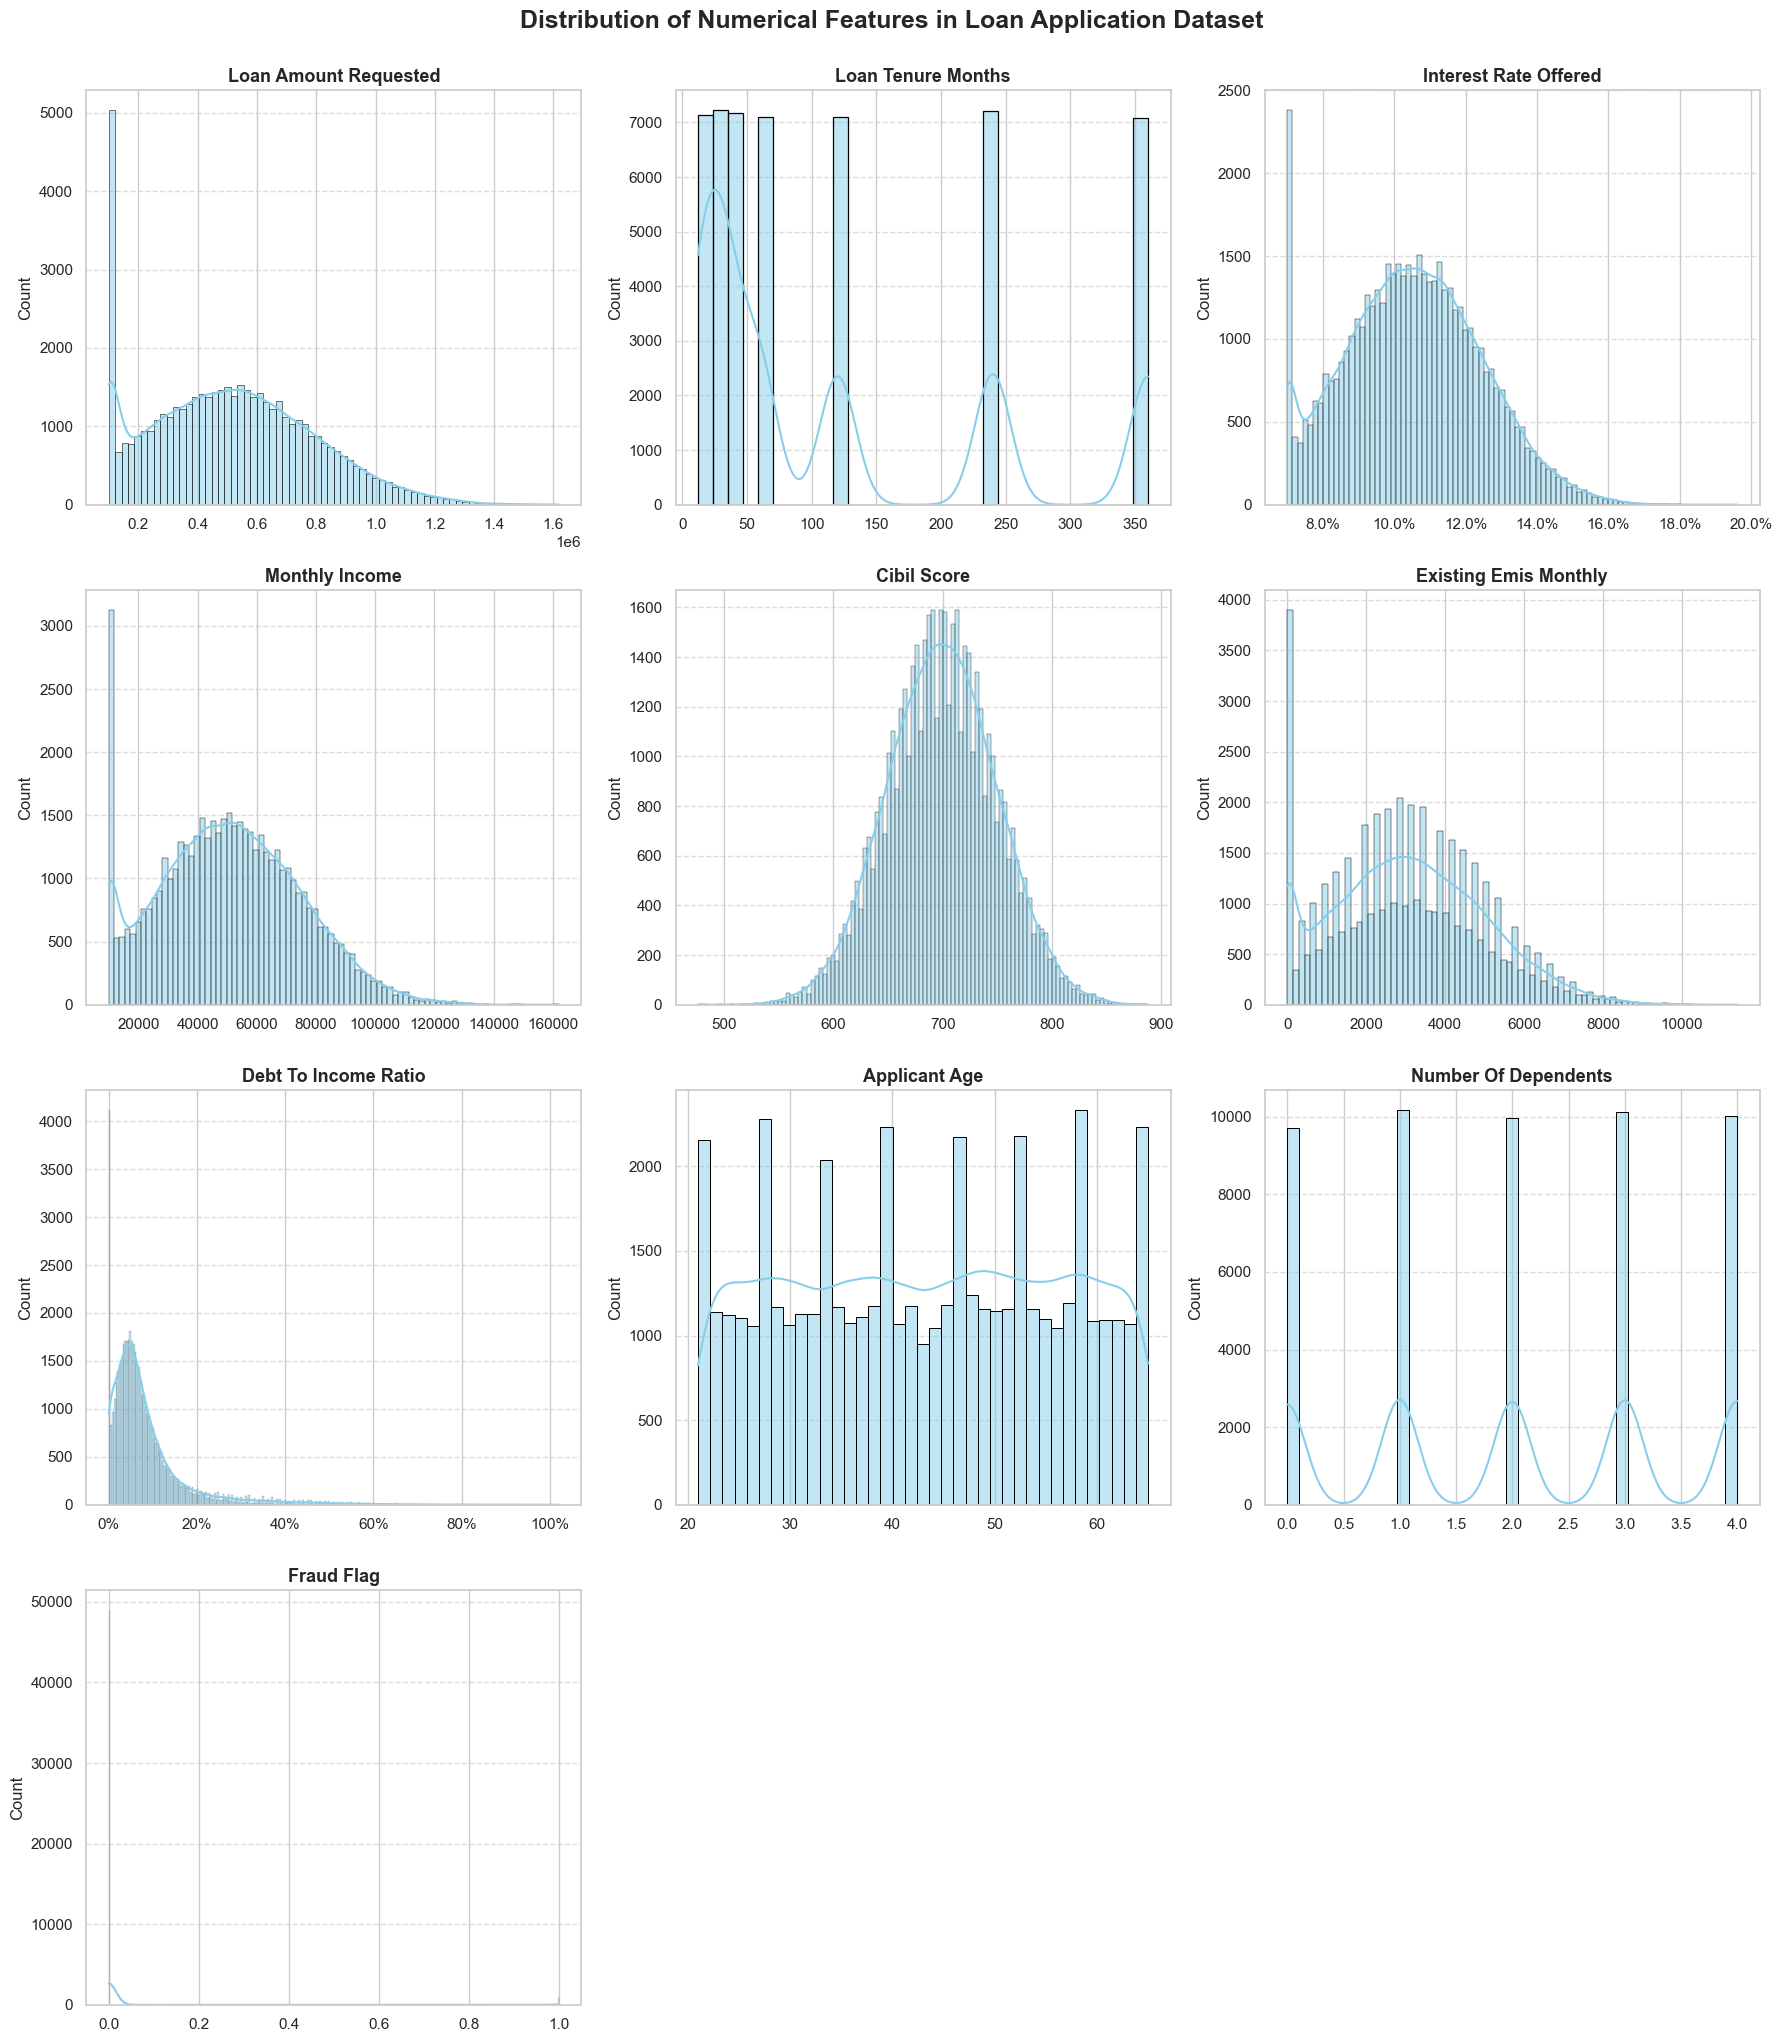

In [95]:
import matplotlib.ticker as mtick
numeric_cols = [feature for feature in df1.columns if df1[feature].dtype != 'O']
plt.figure(figsize=(18, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.histplot(df1[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(col.replace('_', ' ').title(), fontsize=13, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if 'rate' in col or 'ratio' in col:
        plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features in Loan Application Dataset', fontsize=18, fontweight='bold', y=1.02)
plt.show()

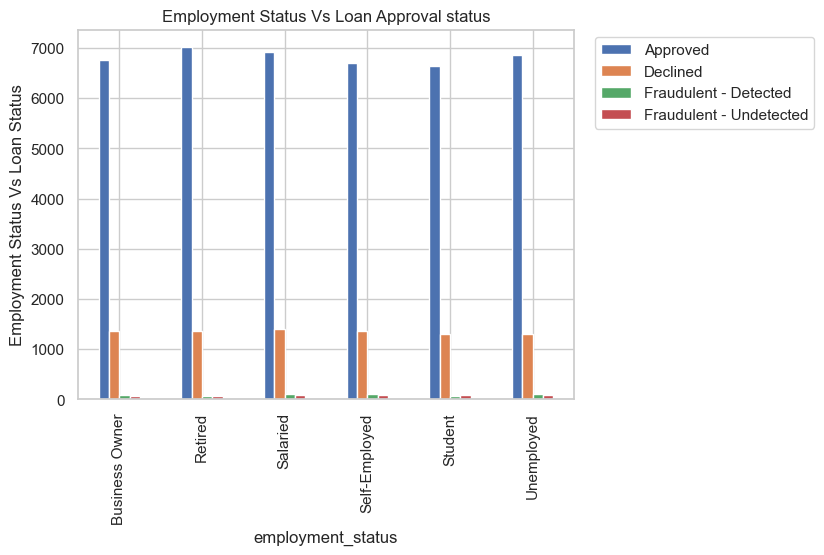

In [96]:
df1.groupby('employment_status')['loan_status'].value_counts().unstack().plot.bar(ylabel='Employment Status Vs Loan Status')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Employment Status Vs Loan Approval status')
plt.show()

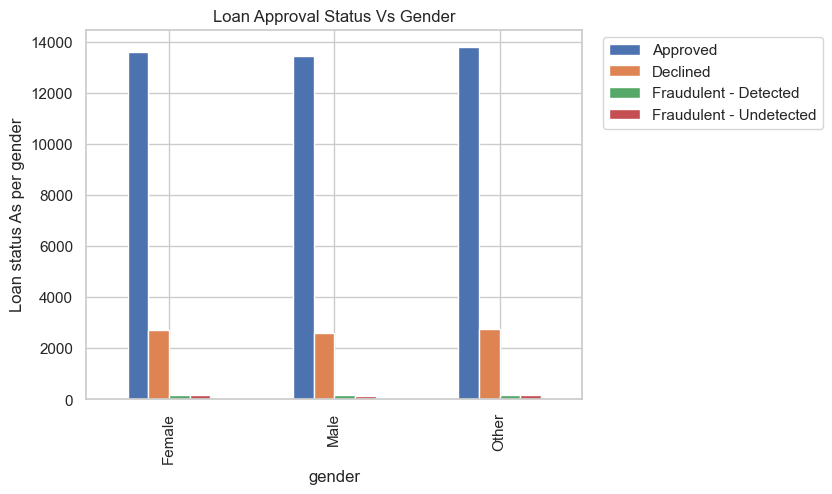

In [97]:
df1.groupby('gender')['loan_status'].value_counts().unstack().plot.bar(ylabel='Loan status As per gender')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Loan Approval Status Vs Gender')
plt.show()

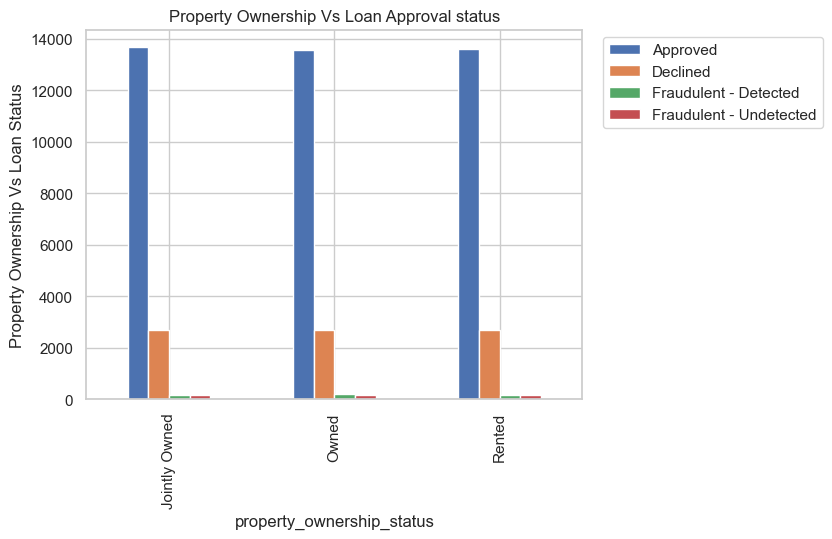

In [98]:
df1.groupby('property_ownership_status')['loan_status'].value_counts().unstack().plot.bar(ylabel='Property Ownership Vs Loan Status')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Property Ownership Vs Loan Approval status') 
plt.show()

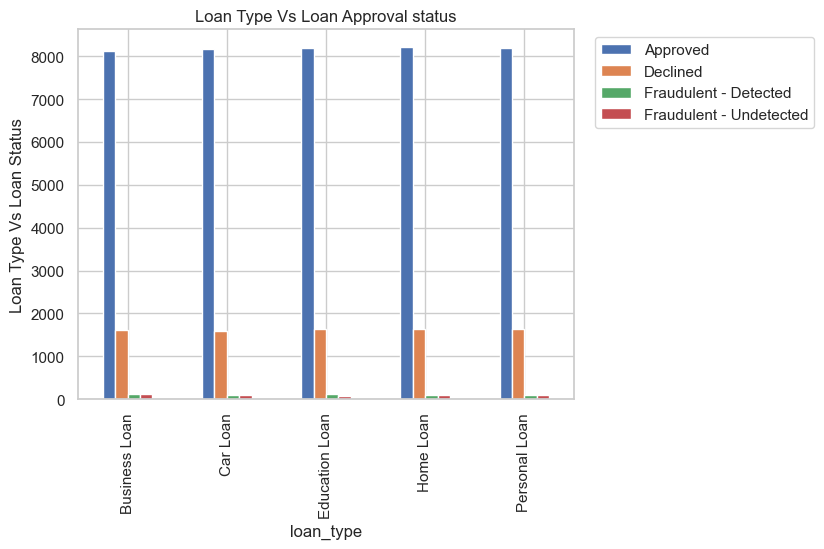

In [99]:
df1.groupby('loan_type')['loan_status'].value_counts().unstack().plot.bar(ylabel='Loan Type Vs Loan Status')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Loan Type Vs Loan Approval status')
plt.show()

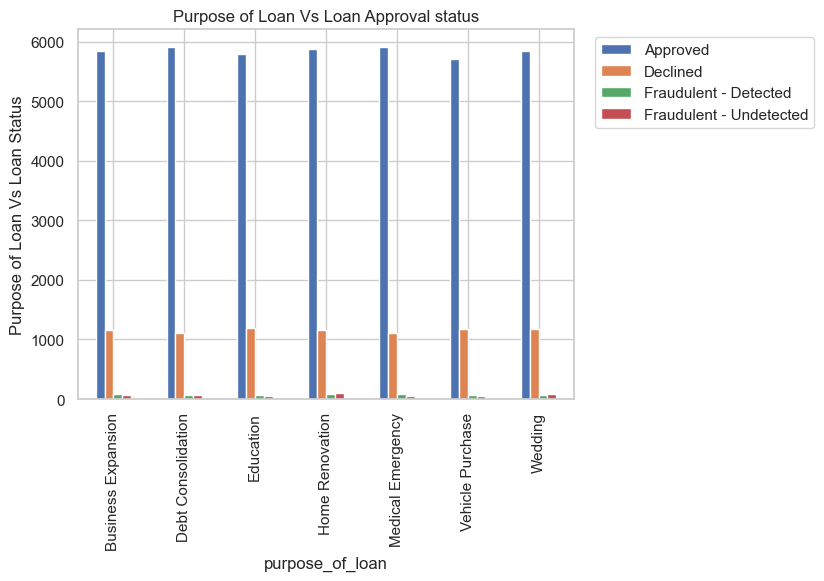

In [100]:
df1.groupby('purpose_of_loan')['loan_status'].value_counts().unstack().plot.bar(ylabel='Purpose of Loan Vs Loan Status')
plt.legend(bbox_to_anchor=[1.5,1.0],loc='upper right')
plt.title('Purpose of Loan Vs Loan Approval status')
plt.show()

Numerical columns: ['loan_amount_requested', 'loan_tenure_months', 'interest_rate_offered', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'applicant_age', 'number_of_dependents', 'fraud_flag']
Box plots for numerical features:


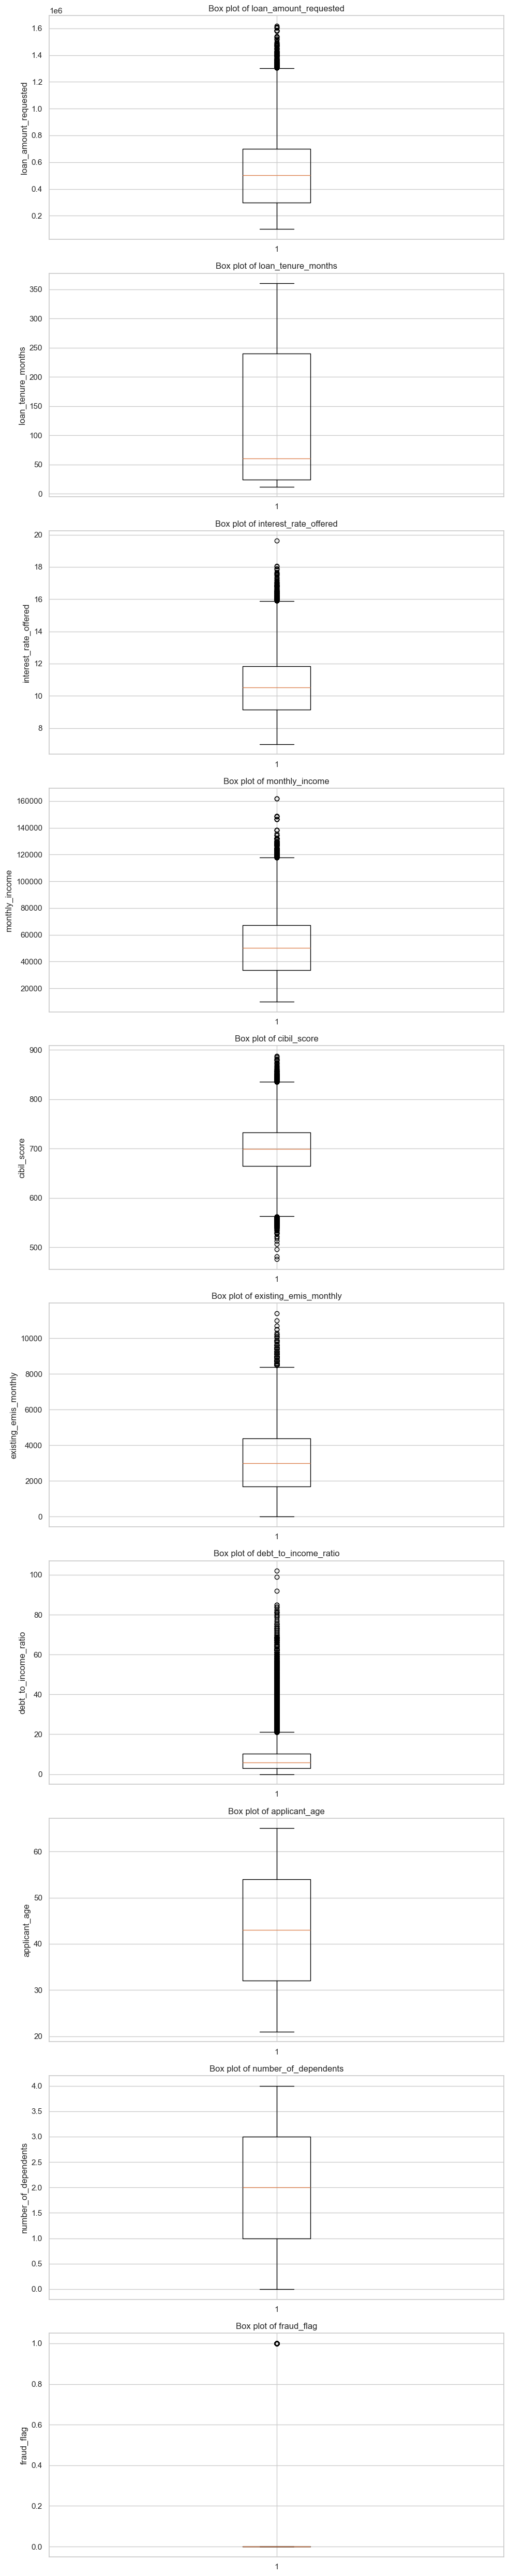

In [101]:
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

print("Box plots for numerical features:")
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df1[col].dropna())
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

##### Report on Findings from the Loan Application Dataset

---

##### 1. Loan Amount Requested
- **Distribution:** Right-skewed; most requests are for lower amounts, with fewer high-value applications.
- **Key Insights:**
    - Majority of applicants request moderate loan amounts.
    - High-value applications are rare and may represent special or high-risk cases.

---

##### 2. Loan Tenure Months
- **Distribution:** Distinct peaks at standard tenures (12, 24, 36, 120, 240 months).
- **Key Insights:**
    - Applicants prefer standard durations, likely reflecting lender policies.
    - Long-term loans (240 months) are common, suggesting a preference for lower EMIs.

---

##### 3. Interest Rate Offered
- **Distribution:** Bell-shaped, centered around 10–14%.
- **Key Insights:**
    - Most applicants receive competitive interest rates.
    - A small group receives very low rates, likely due to excellent creditworthiness.

---

##### 4. Monthly Income
- **Distribution:** Right-skewed; most incomes between ₹20,000–₹80,000.
- **Key Insights:**
    - Few high-income earners may qualify for larger loans or better terms.
    - Reflects income disparity among applicants.

---

##### 5. CIBIL Score
- **Distribution:** Normal curve, centered around 700.
- **Key Insights:**
    - Most applicants have good to excellent credit scores (650–750).
    - Lower scores indicate a segment of higher-risk applicants.

---

##### 6. Existing EMIs Monthly
- **Distribution:** Right-skewed; most have low existing EMIs.
- **Key Insights:**
    - Low existing EMIs suggest greater repayment capacity.
    - High EMIs may lead to higher rejection rates or stricter evaluation.

---

##### 7. Debt-to-Income Ratio
- **Distribution:** Heavily skewed; majority below 40%.
- **Key Insights:**
    - Low ratios indicate sound financial health.
    - High ratios may signal over-leveraging and potential defaults.

---

##### 8. Applicant Age
- **Distribution:** Approximately uniform, ages 20–60, with clustering in mid-30s.
- **Key Insights:**
    - Broad age range shows inclusive lending.
    - Younger applicants may have limited credit history; older applicants may be more established.

---

##### 9. Number of Dependents
- **Distribution:** Peaks at 0, 1, 2, 3, and 4 dependents.
- **Key Insights:**
    - Most applicants have 0–2 dependents, indicating manageable obligations.
    - More dependents may increase financial strain.

---

##### 10. Fraud Flag
- **Distribution:** Highly imbalanced; very few flagged as fraud.
- **Key Insights:**
    - Fraudulent applications are rare, reflecting strong screening.
    - Low fraud rate may indicate well-defined customer profiles.

---

##### 11. Purpose of Loan vs Loan Approval Status
- **Distribution:** Across all loan purposes, the majority of loans are approved, with consistent trends for Business Expansion, Education, Medical Emergency, etc.
- **Key Insights:**
    - Most loan purposes see high approval rates, indicating no strong bias.
    - Declined applications are a smaller portion and are distributed evenly across purposes.
    - Fraudulent transactions (detected/undetected) are rare and spread across all purposes, with slightly higher detected fraud in Business Expansion and Education.

---

##### 12. Loan Type vs Loan Approval Status
- **Distribution:** Business, Personal, and Education Loans have the highest number of approvals; Personal and Car Loans see marginally more declines.
- **Key Insights:**
    - Approval rates are similar across major loan types.
    - Declines are slightly higher for Personal and Car Loans, possibly due to stricter criteria.
    - Fraudulent cases are rare and evenly distributed, with Business Loans showing slightly higher detected fraud.

---

##### 13. Gender vs Loan Approval Status
- **Distribution:** The majority of loan applications are approved for all gender categories (Female, Male, Other), with similar counts across genders.
- **Key Insights:**
    - No significant gender bias in loan approvals.
    - Declined loans are much fewer and distributed consistently across genders.
    - Fraudulent applications are rare and not associated with any particular gender.
    - The process appears equitable and fair across all gender categories.


#### 4.2.) Transaction Dataset: EDA Analysis

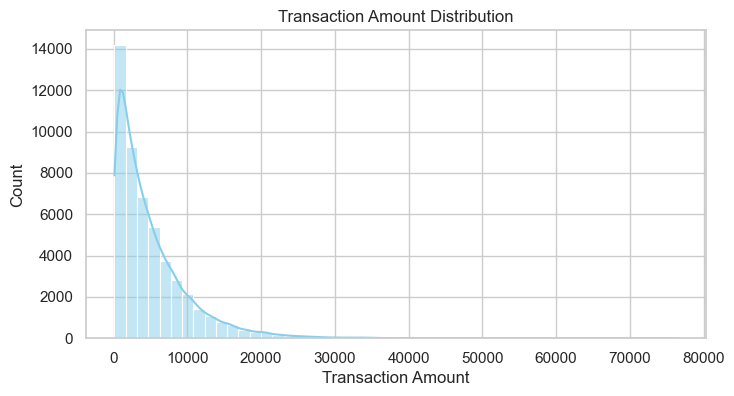

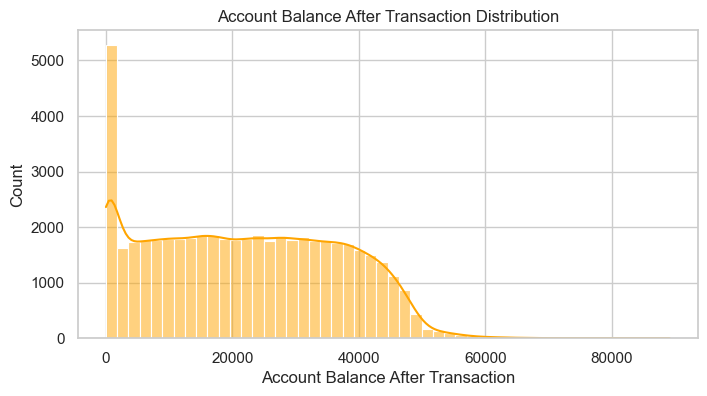

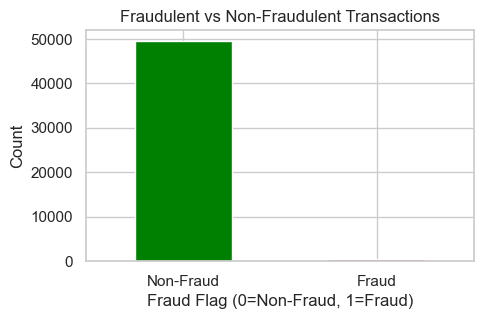

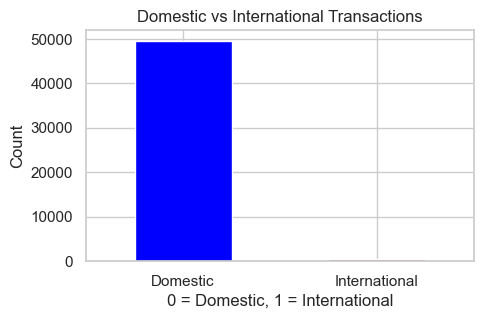

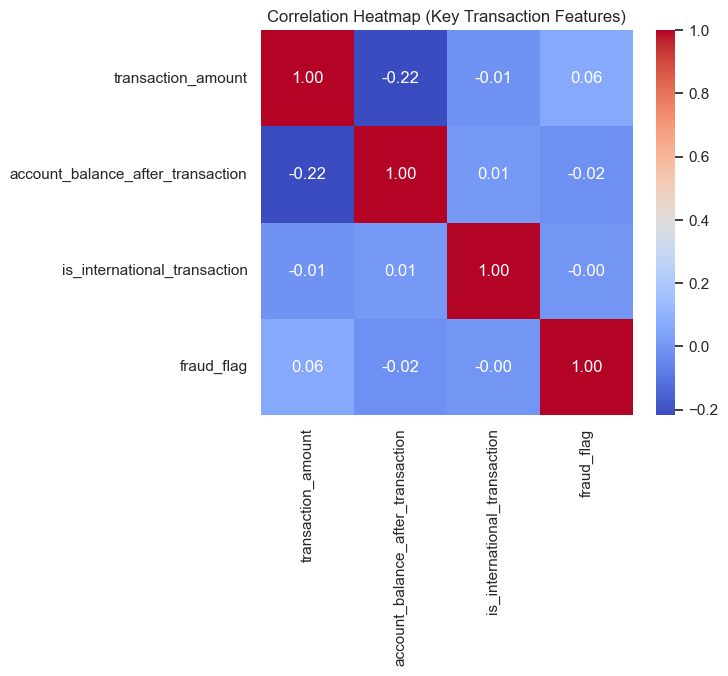

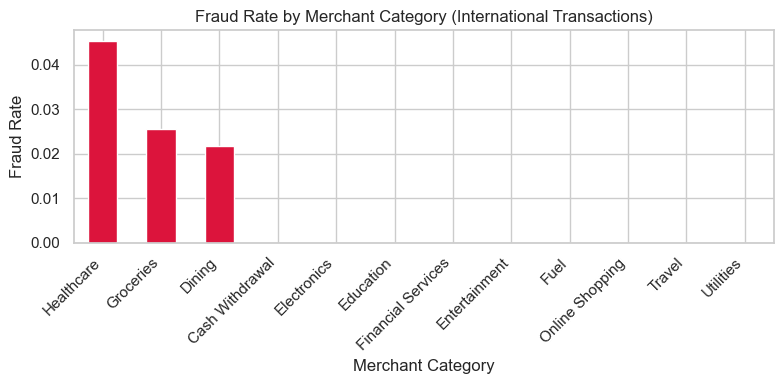

<Figure size 800x400 with 0 Axes>

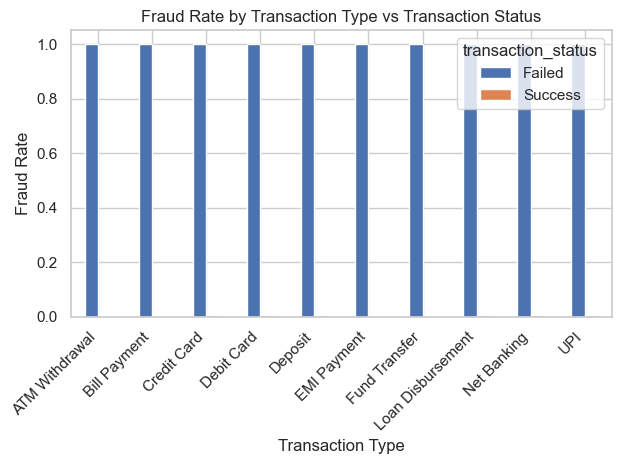

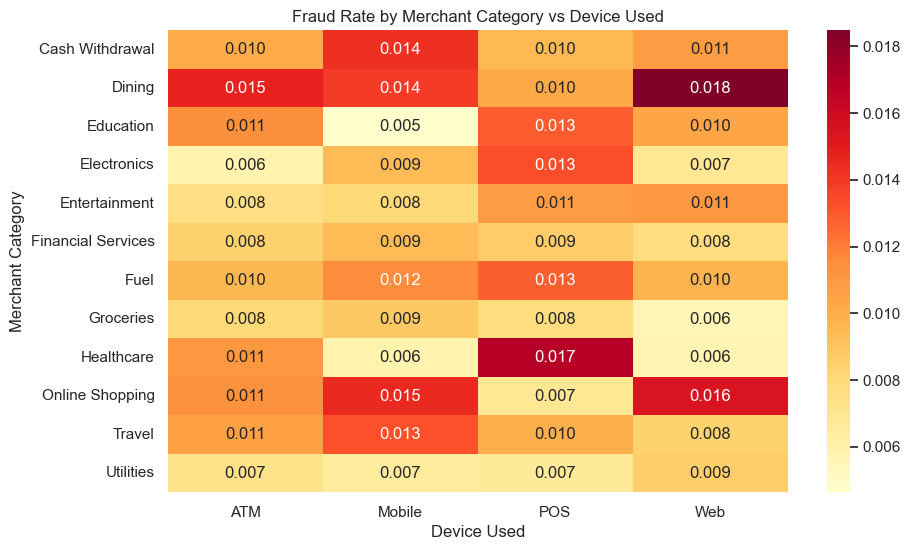

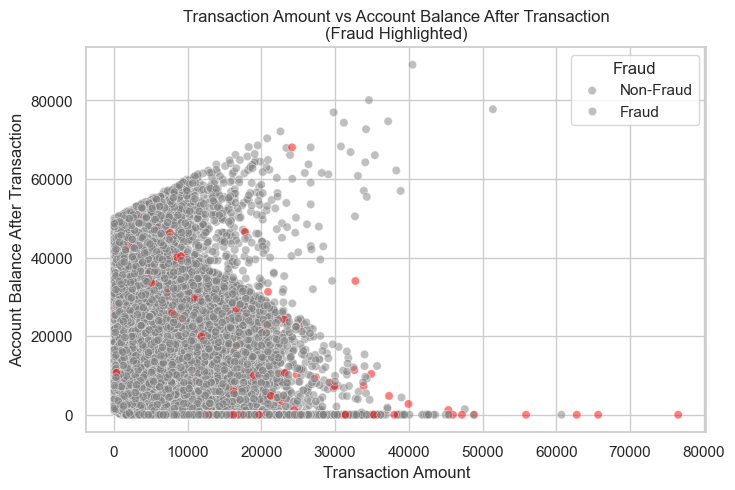

<Figure size 1200x500 with 0 Axes>

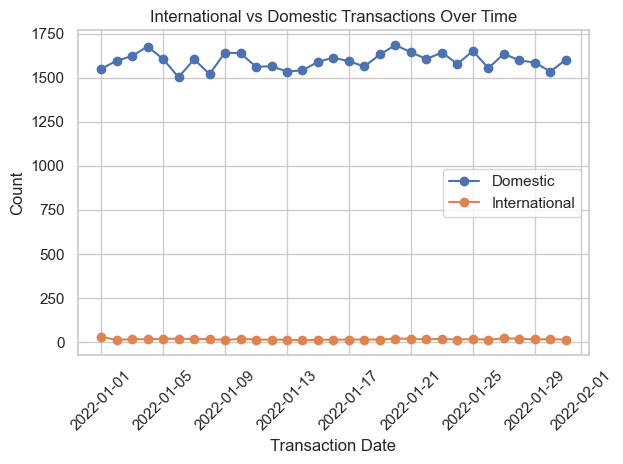

In [103]:

# 1. Transaction Amount Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df2['transaction_amount'], bins=50, kde=True, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

# 2. Account Balance After Transaction Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df2['account_balance_after_transaction'], bins=50, kde=True, color='orange')
plt.title('Account Balance After Transaction Distribution')
plt.xlabel('Account Balance After Transaction')
plt.ylabel('Count')
plt.show()

# 3. Fraudulent vs Non-Fraudulent Transactions (Imbalance)
plt.figure(figsize=(5, 3))
df2['fraud_flag'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud Flag (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# 4. Domestic vs International Transactions
plt.figure(figsize=(5, 3))
df2['is_international_transaction'].value_counts().plot(kind='bar', color=['blue', 'purple'])
plt.title('Domestic vs International Transactions')
plt.xlabel('0 = Domestic, 1 = International')
plt.ylabel('Count')
plt.xticks([0, 1], ['Domestic', 'International'], rotation=0)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Key Transaction Features)')
plt.show()

# 6. Fraud Breakdown by Merchant Category (International Transactions)
plt.figure(figsize=(8, 4))
intl_fraud.plot(kind='bar', color='crimson')
plt.title('Fraud Rate by Merchant Category (International Transactions)')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Fraud Rate by Transaction Type vs Transaction Status
plt.figure(figsize=(8, 4))
fraud_heatmap2.plot(kind='bar', stacked=False)
plt.title('Fraud Rate by Transaction Type vs Transaction Status')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Fraud Rate by Merchant Category vs Device Used
plt.figure(figsize=(10, 6))
sns.heatmap(fraud_heatmap1, annot=True, cmap='YlOrRd', fmt=".3f")
plt.title('Fraud Rate by Merchant Category vs Device Used')
plt.xlabel('Device Used')
plt.ylabel('Merchant Category')
plt.show()

# 9. Transaction Amount vs Account Balance After Transaction (Fraud Highlighted)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df2, 
    x='transaction_amount', 
    y='account_balance_after_transaction', 
    hue='fraud_flag', 
    palette={0: 'grey', 1: 'red'}, 
    alpha=0.5
)
plt.title('Transaction Amount vs Account Balance After Transaction\n(Fraud Highlighted)')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance After Transaction')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

# 10. International vs Domestic Transactions Over Time
plt.figure(figsize=(12, 5))
intl_dom.plot(kind='line', marker='o')
plt.title('International vs Domestic Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Domestic', 'International'])
plt.tight_layout()
plt.show()

##### Report on Findings from the Transaction Dataset 

---

**1. Transaction Distribution**
- **Transaction Amount:** Most transactions are of moderate value, with a right-skewed distribution and a few high-value outliers.
- **Account Balance After Transaction:** Account balances post-transaction vary widely, indicating diverse customer financial profiles.
- **Transaction Type:** UPI, Debit Card, and Credit Card are the most common transaction types.
- **Device Used:** Transactions are distributed across Web, Mobile, ATM, and POS devices, with Web and Mobile being most frequent.
- **Merchant Category:** Categories like Groceries, Dining, and Electronics are most common.
- **Transaction Location:** Certain locations see higher transaction volumes, with a few locations standing out as hotspots.

---

**2. Transaction Patterns**
- **Source-Destination:** Most transactions are between customer accounts and merchants, with some peer-to-peer transfers.
- **Customer Behavior:** Top customers by transaction count show a preference for specific transaction types and merchants.
- **Temporal Trends:** Transaction volume is consistent throughout the month, with minor daily and hourly fluctuations.
- **Domestic vs International:** The vast majority of transactions are domestic; international transactions are rare.

---

**3. Fraud Analysis**
- **Overall Fraud Rate:** About 1% of transactions are flagged as fraudulent.
- **Fraud by Amount & Balance:** Fraudulent transactions tend to have slightly higher amounts and lower post-transaction balances.
- **Fraud by Type & Status:** Fraud is more prevalent in certain transaction types (e.g., Credit Card, Fund Transfer) and is higher among failed transactions.
- **Fraud by Device:** Mobile and Web transactions show marginally higher fraud rates compared to ATM and POS.
- **Fraud by Merchant Category:** Healthcare and Groceries have the highest fraud rates among merchant categories.
- **Fraud by Location:** Some locations have a higher concentration of fraudulent transactions.
- **International Fraud:** International transactions have a higher fraud rate compared to domestic ones.

---

**4. Correlation Insights**
- **Feature Relationships:** Transaction amount and account balance after transaction are negatively correlated. Fraud flag shows weak positive correlation with transaction amount and weak negative correlation with account balance after transaction.
- **No strong linear relationships** between most features, indicating the need for complex models for fraud detection.
